In [43]:
import pandas as pd
import sklearn
import numpy as np
import scipy as sp
import seaborn as sns

print(pd.__version__)
print(sklearn.__version__)
print(np.__version__)
print(sp.__version__)
print(sns.__version__)

1.4.0
1.0.2
1.22.2
1.7.3
0.11.2


#### Digits dataset

Source: http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

In [1]:
from sklearn.datasets import load_digits

In [2]:
digits_dataset = load_digits(n_class=10)

In [7]:
print(digits_dataset.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [11]:
digits_dataset.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [10]:
digits_dataset.target

array([0, 1, 2, ..., 8, 9, 8])

In [12]:
digits_dataset.data.shape

(1797, 64)

In [14]:
import matplotlib.pyplot as plt

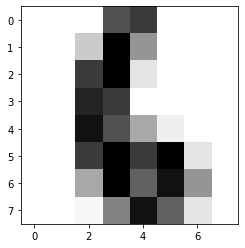

In [17]:
plt.imshow(digits_dataset.images[6], cmap='Greys')
plt.show()

#Sklearn DB to Padndas dataframe

In [24]:
# np.c_ is the numpy concatenate function
# which is used to concat digits_dataset['data'] and digits_dataset['target'] arrays 
# for pandas column argument: concat digits_dataset['feature_names'] list
# and string list (in this case one string); you can make this anything you'd like..  
# the original dataset would probably call this ['Species']
digits_df = pd.DataFrame(data= np.c_[digits_dataset['data'], digits_dataset['target']],
                     columns= digits_dataset['feature_names'] + ['target'])

In [25]:
type(digits_df)

pandas.core.frame.DataFrame

In [26]:
digits_df.describe()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
count,1797.0,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,...,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000
mean,0.0,0.303840,5.204786,11.835838,11.848080,5.781859,1.362270,0.129661,0.005565,1.993879,...,0.206455,0.000556,0.279354,5.557596,12.089037,11.809126,6.764051,2.067891,0.364496,4.490818
std,0.0,0.907192,4.754826,4.248842,4.287388,5.666418,3.325775,1.037383,0.094222,3.196160,...,0.984401,0.023590,0.934302,5.103019,4.374694,4.933947,5.900623,4.090548,1.860122,2.865304
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,1.000000,10.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,11.000000,10.000000,0.000000,0.000000,0.000000,2.000000
50%,0.0,0.000000,4.000000,13.000000,13.000000,4.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,4.000000,13.000000,14.000000,6.000000,0.000000,0.000000,4.000000
75%,0.0,0.000000,9.000000,15.000000,15.000000,11.000000,0.000000,0.000000,0.000000,3.000000,...,0.000000,0.000000,0.000000,10.000000,16.000000,16.000000,12.000000,2.000000,0.000000,7.000000
max,0.0,8.000000,16.000000,16.000000,16.000000,16.000000,16.000000,15.000000,2.000000,16.000000,...,13.000000,1.000000,9.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,9.000000


In [29]:
digits_df.shape 

(1797, 65)

In [31]:
digits_df.target.unique()

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

Text(0, 0.5, 'pixel_0_0')

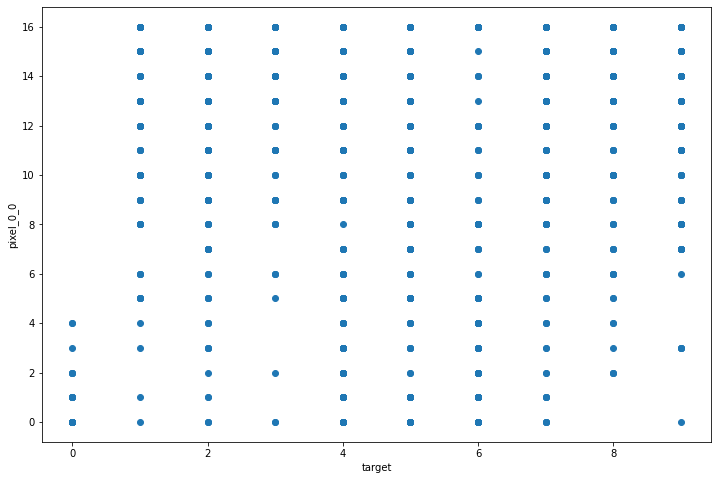

In [39]:
fig, ax = plt.subplots(figsize=(12, 8))

plt.scatter(digits_df['target'], digits_df['pixel_3_4'])

plt.xlabel('target')
plt.ylabel('pixel_0_0')

<AxesSubplot:>

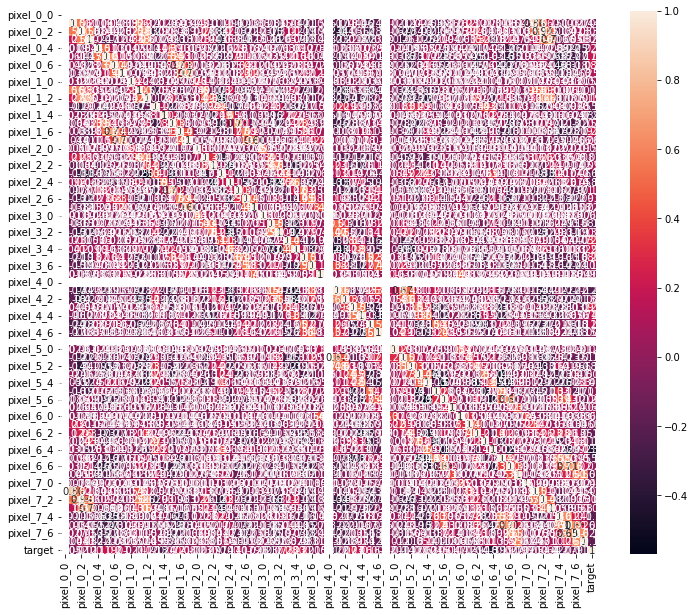

In [44]:
fig, ax = plt.subplots(figsize=(12, 10))

sns.heatmap(digits_df.corr(), annot=True)

In [45]:
X = digits_df.drop('target', axis=1)
Y = digits_df['target']

In [46]:
X.columns

Index(['pixel_0_0', 'pixel_0_1', 'pixel_0_2', 'pixel_0_3', 'pixel_0_4',
       'pixel_0_5', 'pixel_0_6', 'pixel_0_7', 'pixel_1_0', 'pixel_1_1',
       'pixel_1_2', 'pixel_1_3', 'pixel_1_4', 'pixel_1_5', 'pixel_1_6',
       'pixel_1_7', 'pixel_2_0', 'pixel_2_1', 'pixel_2_2', 'pixel_2_3',
       'pixel_2_4', 'pixel_2_5', 'pixel_2_6', 'pixel_2_7', 'pixel_3_0',
       'pixel_3_1', 'pixel_3_2', 'pixel_3_3', 'pixel_3_4', 'pixel_3_5',
       'pixel_3_6', 'pixel_3_7', 'pixel_4_0', 'pixel_4_1', 'pixel_4_2',
       'pixel_4_3', 'pixel_4_4', 'pixel_4_5', 'pixel_4_6', 'pixel_4_7',
       'pixel_5_0', 'pixel_5_1', 'pixel_5_2', 'pixel_5_3', 'pixel_5_4',
       'pixel_5_5', 'pixel_5_6', 'pixel_5_7', 'pixel_6_0', 'pixel_6_1',
       'pixel_6_2', 'pixel_6_3', 'pixel_6_4', 'pixel_6_5', 'pixel_6_6',
       'pixel_6_7', 'pixel_7_0', 'pixel_7_1', 'pixel_7_2', 'pixel_7_3',
       'pixel_7_4', 'pixel_7_5', 'pixel_7_6', 'pixel_7_7'],
      dtype='object')

In [47]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [50]:
x_train.shape, x_test.shape

((1437, 64), (360, 64))

In [77]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import svm

C = 1.0  # SVM regularization parameter
mnb = MultinomialNB()
clasifier = svm.SVC(kernel="poly", degree=3, gamma="auto", C=C)
y_pred = clasifier.fit(x_train, y_train).predict(x_test)
print("Number of mislabeled points out of a total %d points : %d"
      % (x_test.shape[0], (y_test != y_pred).sum()))


models = (
    svm.SVC(kernel="linear", C=C),
    svm.LinearSVC(C=C, max_iter=10000),
    svm.SVC(kernel="rbf", gamma=0.7, C=C),
    svm.SVC(kernel="poly", degree=3, gamma="auto", C=C),
    MultinomialNB()
)

Number of mislabeled points out of a total 360 points : 5


In [74]:
models = (clf.fit(x_train, y_train) for clf in models)
y_pred = (clf.predict(x_test)  for clf in models)
res =  ((y_test != pred).sum()  for pred in y_pred)
# print("Number of mislabeled points out of a total %d points : %d"
#       % (x_test.shape[0], (y_test != y_pred).sum()))
[print(i) for i in res]


13
36
332
5
43


[None, None, None, None, None]

In [60]:
df_pred_actual = pd.DataFrame({'predicted': y_pred, 'actual': y_test})
df_pred_actual.head(10)


,predicted,actual
778,2.0,2.0
623,1.0,1.0
699,8.0,8.0
225,4.0,4.0
204,5.0,5.0
574,6.0,6.0
170,1.0,8.0
1713,5.0,5.0
1103,8.0,8.0
954,7.0,7.0


In [78]:
from sklearn.metrics import r2_score

print("Testing_score : ", r2_score(y_test, y_pred))

Testing_score :  0.9563461037268699


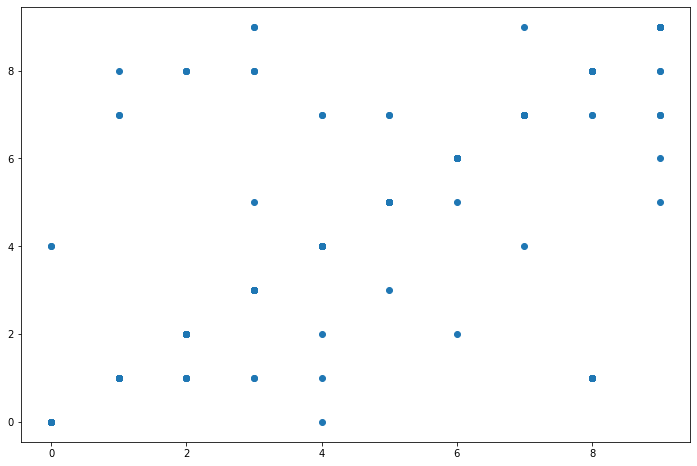

In [58]:
fig, ax = plt.subplots(figsize=(12, 8))

plt.scatter(y_test, y_pred)
plt.show()